In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import pickle
import time

from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

import os
import transformers
from transformers import *

import tensorflow_hub as hub
import tensorflow_text

os.environ["TF_KERAS"]='1'

import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

nltk.download("all")

D:\anaconda3\envs\tf-2-9-1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\anaconda3\envs\tf-2-9-1\lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_p

[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to

[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-t

True

In [56]:
print(tf.__version__)

2.10.1


## Sommaire

A partir d'une description textuelle d'un produit, nous allons essayer de prédire sa catégorie parmi les 7 (Home Furnishing , Baby Care , Watches , Home Decor & Festive Needs , Kitchen & Dining , Beauty and Personal Care , Computers).

Nous allons d'abord préparer le texte différement selon la démarche utilisée.

Nous allons voir 2 approches différentes : 
   - le bag of words avec CountVecorizer et Tf-idf
   - le word/sentence embedding avec Word2Vec, BERT et USE

### <a href='#1'> Importation du jeu de données
    
### <a href='#2'> Nettoyage du texte
    
### <a href='#3'> Création et encodage de la target
    
### <a href='#4'> Fonctions communes
    
### <a href='#5'> Bag of word - Tf-idf
    
### <a href='#6'> Word2Vec
    
### <a href='#7'> BERT
    
### <a href='#8'> USE - Universal Sentence Encoder

## <a name='1'> Importation du jeu de données

In [2]:
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
df.shape

(1050, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

Description des features :


    - uniq_id est l'identifiant de l'article
    - crawl_timestamp est la date de création
    - product_url est l'url de l'article
    - product_name est le nom du produit
    - product_category_tree est l'arborescence de la catégorie du produit
    - pid est la conformité du produit
    - retail_price est le prix de l'article
    - discounted_price est le prix soldé
    - image est une photo du produit
    - is_FK_Advantage_product
    - description est la description du produit
    - product_rating est la note du produit
    - overall_rating est la note globale du produit
    - brand est la marque du produit
    - product_specifications est la spécification du produit

In [6]:
df['product_rating'].unique()

array(['No rating available', '5', '1', '2.3', '2.7', '4.5', '4', '3.8',
       '4.3', '3.7', '3.6', '3.5', '4.1', '4.9', '3.1', '4.2', '4.8',
       '4.4', '3.9', '3', '3.3', '2.5', '2', '4.7', '2.2', '3.2', '1.5'],
      dtype=object)

In [7]:
df['overall_rating'].unique()

array(['No rating available', '5', '1', '2.3', '2.7', '4.5', '4', '3.8',
       '4.3', '3.7', '3.6', '3.5', '4.1', '4.9', '3.1', '4.2', '4.8',
       '4.4', '3.9', '3', '3.3', '2.5', '2', '4.7', '2.2', '3.2', '1.5'],
      dtype=object)

In [58]:
df['product_category_tree']

0       ["Home Furnishing >> Curtains & Accessories >>...
1       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
                              ...                        
1045    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1046    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1047    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1048    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1049    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 1050, dtype: object

In [9]:
# Choix des variables
data_T = df[['image','description','product_category_tree']]

In [10]:
data_T.shape

(1050, 3)

## <a name='2'> Nettoyage du texte

Dans cette partie, nous coupons le texte en mots. Certains mots et symboles sont supprimés. Les mots sont mis en minuscules et, selon l'approche, lemmatisés.

In [11]:
# Tokenizer
def tokenizer_fct(sentence) :
    """Tokenise sentence."""
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    """Supprime les stop_words et les mots de longueur inférieure à 3."""
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    """Mets en minuscule et supprime les mots commençant par @, # et http."""
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
                                       and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
def lemma_fct(list_words) :
    """Lemmatize list_words"""
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Stemmatisation
def stemm_fct(list_words) :
    """Stemming sur list_words"""
    stemmer = nltk.PorterStemmer()
    stem_w = [stemmer.stem(w) for w in list_words]
    return stem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    """Prépare le texte pour un bow sans lemmatization."""
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    """Prépare le texte pour un bow avec lemmatization."""
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    """
    Prépare le texte pour le deep learning.
    Pas de lemmatization et on garde les stop_words.
    """
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# On exécute les 3 préparations de texte
data_T['sentence_bow'] = data_T['description'].apply(lambda x : transform_bow_fct(x))
data_T['sentence_bow_lem'] = data_T['description'].apply(lambda x : transform_bow_lem_fct(x))
data_T['sentence_dl'] = data_T['description'].apply(lambda x : transform_dl_fct(x))
data_T.shape

C:\Users\matth\AppData\Local\Temp\ipykernel_8392\4187014535.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T['sentence_bow'] = data_T['description'].apply(lambda x : transform_bow_fct(x))
C:\Users\matth\AppData\Local\Temp\ipykernel_8392\4187014535.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T['sentence_bow_lem'] = data_T['description'].apply(lambda x : transform_bow_lem_fct(x))
C:\Users\matth\AppData\Local\Temp\ipykernel_8392\4187014535.py:75: SettingWithCopyWarning: 
A value is try

(1050, 6)

In [12]:
# Test des fonctions

texte = 'I am doing a test. Hope it works !!!'
texte_mod = tokenizer_fct(texte)
texte_mod

['I', 'am', 'doing', 'a', 'test', '.', 'Hope', 'it', 'works', '!', '!', '!']

In [13]:
texte_mod = stop_word_filter_fct(texte_mod)
texte_mod

['test', 'Hope', 'works']

In [14]:
texte_mod = lower_start_fct(texte_mod)
texte_mod

['test', 'hope', 'works']

In [15]:
texte_mod = lemma_fct(texte_mod)
texte_mod

['test', 'hope', 'work']

In [16]:
print(f'Le texte {texte} devient {texte_mod}')

Le texte I am doing a test. Hope it works !!! devient ['test', 'hope', 'work']


## <a name='3'> Création de la target

Dans cette partie, nous créons le label du produit à partir de product_category_tree puis nous l'encodons en utilisant LabelEncoder.

In [18]:
def recup_cat(liste_cat):
    """
    Renvoie la liste des catégories de liste_cat sans crochets ni apostrohes.
    Ainsi que la liste des différentes catégories.
    """
    liste = []
    l_cat = []
    for category in liste_cat:
        category = category.split(">>")[0]
        category = category.replace('"','').replace("'","").replace('[','')
        liste.append(category)
        if category not in(l_cat):
            l_cat.append(category)
    return liste, l_cat

In [19]:
categories, l_cat = recup_cat(data_T['product_category_tree'])
categories

['Home Furnishing ',
 'Baby Care ',
 'Baby Care ',
 'Home Furnishing ',
 'Home Furnishing ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Watches ',
 'Home Furnishing ',
 'Home Furnishing ',
 'Home Furnishing ',
 'Home Decor & Festive Needs ',
 'Kitchen & Dining ',
 'Kitchen & Dining ',
 'Home Furnishing ',
 'Baby Care ',
 'Home Furnishing ',
 'Baby Care ',
 'Beauty and Personal Care ',
 'Kitchen & Dining ',
 'Kitchen & Dining ',
 'Kitchen & Dining ',
 'Computers ',
 'Kitchen & Dining ',
 'Beauty and Personal Care ',
 'Kitchen & Dining ',
 'Computers ',
 'Kitchen & Dining ',
 'Computers ',
 'Computers ',
 'Computers ',
 'Beauty and Personal Care ',
 'Beauty and Personal Care ',
 'Bea

In [20]:
l_cat

['Home Furnishing ',
 'Baby Care ',
 'Watches ',
 'Home Decor & Festive Needs ',
 'Kitchen & Dining ',
 'Beauty and Personal Care ',
 'Computers ']

In [21]:
data_T['target'] = categories
data_T.head()

C:\Users\matth\AppData\Local\Temp\ipykernel_8392\1930911172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T['target'] = categories


,image,description,product_category_tree,sentence_bow,sentence_bow_lem,sentence_dl,target
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,"[""Home Furnishing >> Curtains & Accessories >>...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,Home Furnishing


In [22]:
# Encodage de la target
le = LabelEncoder()
y_cat_num = le.fit_transform(data_T['target'])
y_cat_num

array([4, 0, 0, ..., 0, 0, 0])

In [23]:
data_T['target_num'] = y_cat_num

C:\Users\matth\AppData\Local\Temp\ipykernel_8392\2638301107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T['target_num'] = y_cat_num


In [24]:
# Calcul des longueurs des textes

data_T['length_bow'] = data_T['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['length_bow'].max())
data_T['length_dl'] = data_T['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['length_dl'].max())


C:\Users\matth\AppData\Local\Temp\ipykernel_8392\78487519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T['length_bow'] = data_T['sentence_bow'].apply(lambda x : len(word_tokenize(x)))


max length bow :  379
max length dl :  632


C:\Users\matth\AppData\Local\Temp\ipykernel_8392\78487519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T['length_dl'] = data_T['sentence_dl'].apply(lambda x : len(word_tokenize(x)))


## <a name = '4'> Fonctions communes

Les 2 fonctions suivantes nous permettent, quelque soit l'approche, de déterminer les clusters, de calculer le score ARI entre catégories réelles et prédites puis de visualiser. Il est nécessaire de réduire à 2 composantes pour pouvoir afficher les produits.

In [26]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, perplexite=20) :
    """
    Applique TSNE sur features.
    Détermine les clusters avec KMeans.
    Calcule le score ARI entre les catégories réelles et prédites.
    """
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity= perplexite, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    """Affichage du TSNE et des catégories réelles et prédites."""
    
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


# <a name='5'> Bag of word - Tf-idf

Dans cette partie, nous utilisons l'approche de bag of words en utilisant :
   - CountVectorizer qui donne la fréquence de chaque mot dans son document
   - Tf-idf qui donne la fréquence de chaque mot dans son document en prenant en compte la fréquence de ce mot dans tous les documents

## Préparation sentences

In [27]:
# création du bag of words (CountVectorizer et Tf-idf)

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])  
ctf_transform = ctf.transform(data_T[feat])  

## Exécution des modèles

In [28]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform, perplexite = 15)


CountVectorizer : 
-----------------
ARI :  0.4265 time :  4.0


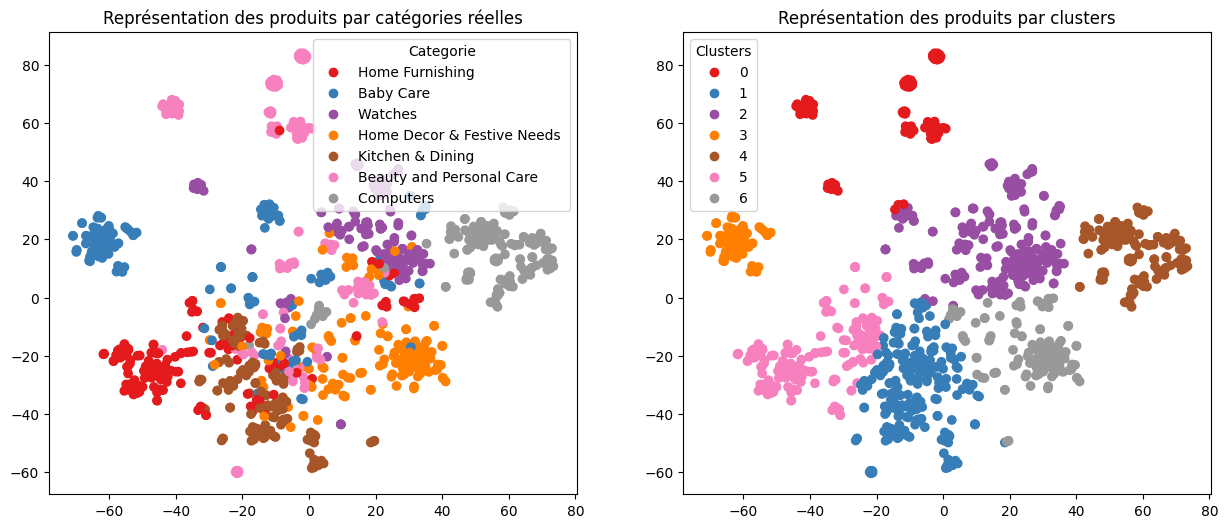

ARI :  0.4265


In [29]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

On retrouve les clusters. Quelques produits sont mal étiquetés. Les catégories 'Baby Care', 'Beauty and personal care' et 'Home furnishing' sont mal définies.

Le score ARI de 0.43 nous confirme l'impression.

In [30]:
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform, perplexite = 15)


Tf-idf : 
--------
ARI :  0.5921 time :  4.0


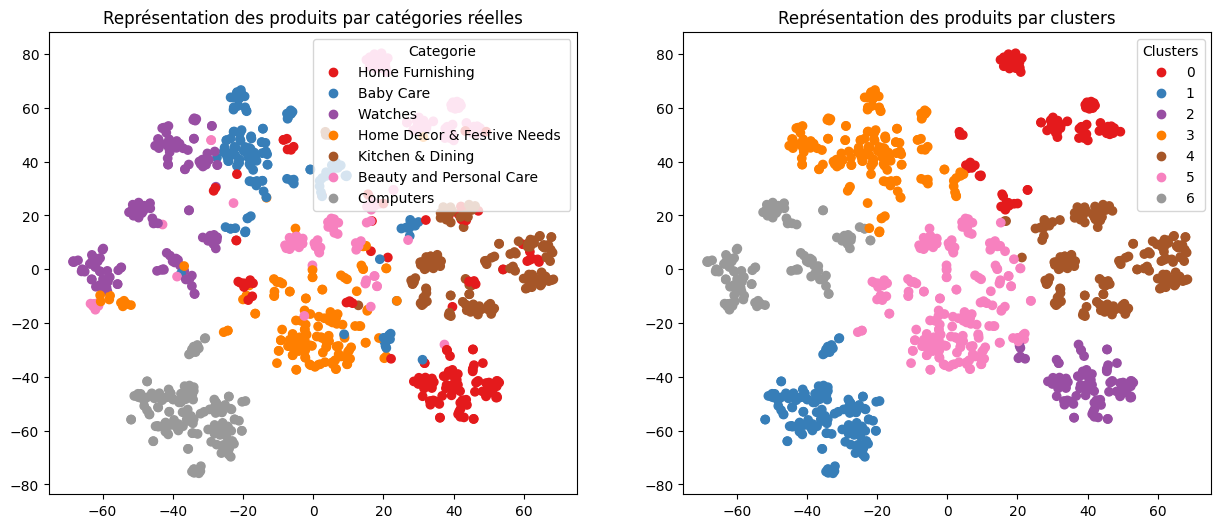

ARI :  0.5921


In [31]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Les clusters sont bien définis. Quelques produits sont mal étiquetés. Les produits 'Home furnishing' se retrouvent dans plusieurs clusters.

Le score ARI de 0.59 nous confirme l'impression.

# <a name='6'> Word2Vec

Word2Vec transforme les mots en vecteurs en se servant des mots qui l'entourent. Les mots similaires en terme de contexte ont des représentations similaires dans l'espace vectoriel.

## Création du modèle Word2Vec

In [32]:
max(data_T['length_bow'])

379

In [33]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 380 # adapt to length of sentences
sentences = data_T['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [34]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
                                                
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


In [35]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


## Création de la matrice d'embedding

In [36]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


## Création du modèle d'embedding

In [37]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 380)]             0         
                                                                 
 embedding (Embedding)       (None, 380, 300)          1413900   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [38]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 3ms/step


(1050, 300)

In [39]:
ARI, X_tsne, labels = ARI_fct(embeddings, perplexite = 25)

ARI :  0.3307 time :  4.0


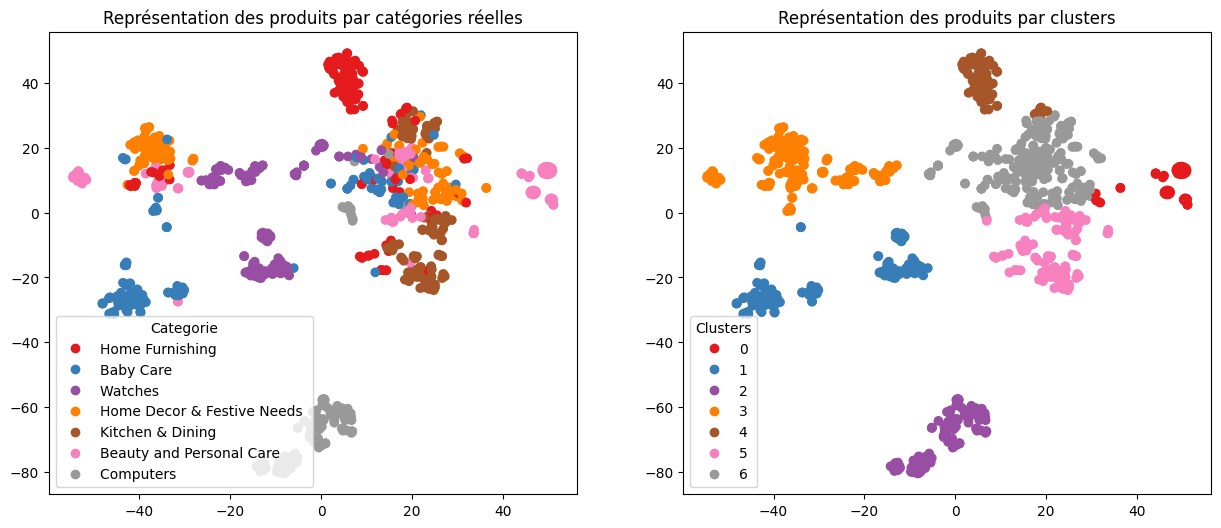

ARI :  0.3307


In [40]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Les clusters sont mal définis. Trop de produits sont mal étiquetés.

Le score ARI de 0.33 nous confirme l'impression.

# <a name = '7'> BERT

BERT utilise le word embedding en prenant en compte tout le document et la position des mots, et prédit un mot en fonction de son contexte en utilisant des masks.

## Fonctions communes

In [42]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT hub Tensorflow

CF https://www.tensorflow.org/text/tutorials/classify_text_with_bert

In [43]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [44]:
sentences = data_T['sentence_dl'].to_list()

In [45]:
max(data_T['length_dl'])

632

In [46]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  37.0


In [47]:
ARI, X_tsne, labels = ARI_fct(features_bert, perplexite=25)

ARI :  0.3307 time :  4.0


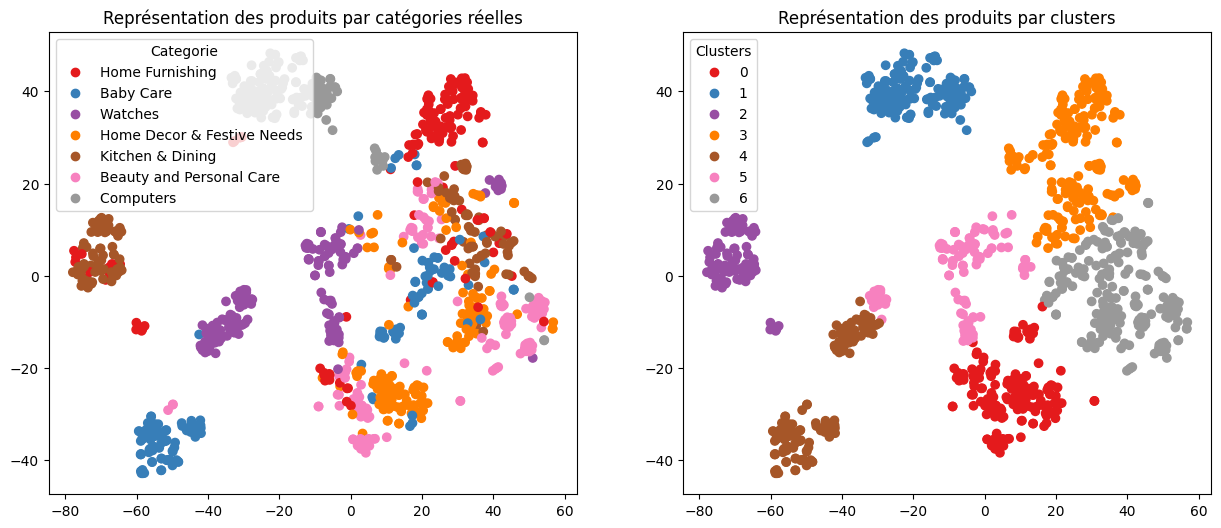

ARI :  0.3307


In [48]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Les clusters sont mal définis. Trop de produits sont mal étiquetés.

Le score ARI de 0.33 nous confirme l'impression.

# <a name='8'> USE - Universal Sentence Encoder

USE représente des phrases ou des paragraphes selon des vecteurs denses qui permettent de mesurer la similarité sémantique entre les phrases.

In [50]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [51]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [52]:
batch_size = 10
sentences = data_T['sentence_dl'].to_list()

In [53]:
features_USE = feature_USE_fct(sentences, batch_size)

In [54]:
ARI, X_tsne, labels = ARI_fct(features_USE, perplexite=30)

ARI :  0.4449 time :  4.0


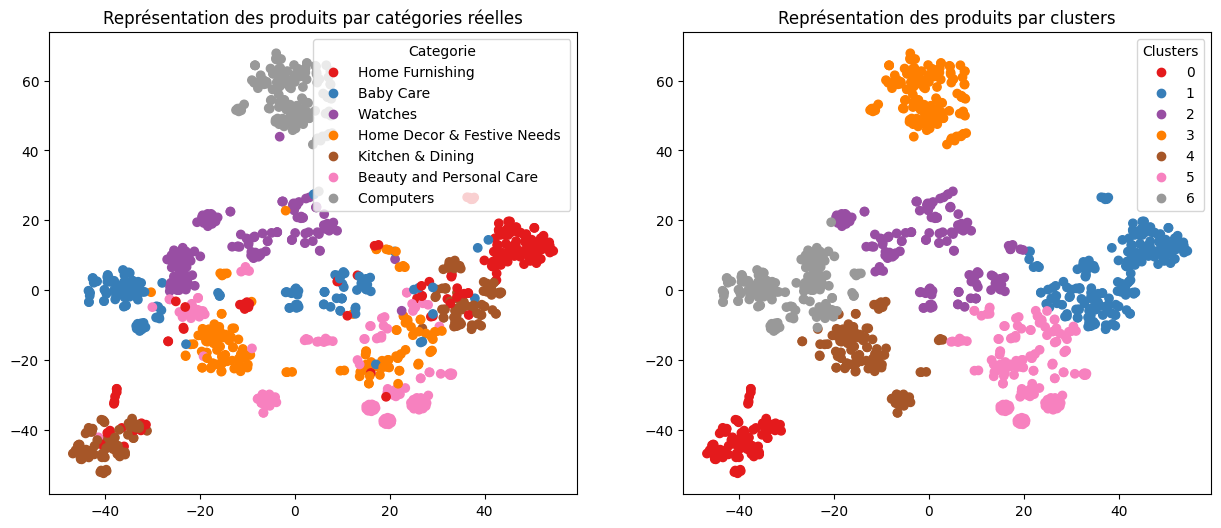

ARI :  0.4449


In [55]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

On retrouve les clusters. Quelques produits sont mal étiquetés. Les produits 'Beauty and personal care' et 'Home decor festive needs' se retrouvent dans plusieurs clusters.

Le score ARI de 0.44 nous confirme l'impression.

Après cette étude de texte, nous pouvons conclure qu'il est possible de faire une classification automatique des produits. La meilleure approche est tf-idf avec un score ARI de 0,59.